# Quantifying Risk and Reward of the Thundering Affix - A World of Warcraft Analysis

Thundering is a mythic keystone dungeon affix introduced in Dragonflight Season 1.

It consists of:
- Lightning Strike: 1s stun and damage to player
- Mark of Wind/Lightning: 15s damage buff
- Primal Overload: 5s stun if a player fails to clear Mark of Wind/Lightning + ticking damage

Season 1 dungeons are tuned around players utilizing this damage buff.

#### Scenario
We wish to quantify what players gained and loss as a result of this affix. From there, we will try to answer the questions:
- How did Thundering perform as an affix. 
- Was it a good affix or a bad affix? 
- What was the impact of Thundering on mythic keystone dungeons in Season 1?

#### The Data
The dataset we are using is a spreadsheet of 145k records of mythic keystone dungeon logs that have been scraped from WarcraftLogs.

### Table of Contents:
1. Data Acquisition \
    1.1 Importing Data \
    1.2 Data Information
2. Data Cleaning and Pre-processing \
    2.1 Drop Columns \
    2.2 Rename Columns \
    2.3 Changing Data Types \
    2.4 Missing and Duplicate Values \
    2.5 Create Caculated Columns: Uptime, Bonus Damage, Keystone Time as a % of Dungeon Timer, If Keystone Timed, All Thundering Deaths
3. Exploratory Data Analysis \
    3.1 Descriptive Statistics \
    3.2 Value Counts of Keystone Levels, Primal Overload Stuns \
    3.3 Bonus Damage and Uptime by Spec, Dungeon \
    3.4 Stuns and Deaths within 10s by Spec, Dungeon \
    3.5 Primal Overload Deaths vs Lightning Strike Deaths
4. Data Visualization \
    4.1 Bar Chart - Distribution of Keystone Levels \
    4.2 Box Plot - Bonus Damage and Uptime by All Runs/Keystone Level \
    4.3 Scatter Plot - Correlation between Bonus Damage and Uptime \
    4.4 Box Plot - Thundering Deaths by All Runs/Keystone Level \
    4.5 Bar Chart - Thundering Deaths within 2, 5 and 10s \
    4.6 Scatter Plot - Correlation between # of Thundering Stuns vs # of Thundering Deaths \
    4.7 Scatter Plot - Timed/Untimed Keys by # of Thundering Stuns \
    4.8 Heatmap - Keystone Time as % of Dungeon Time for Keystone Level against # of Thundering Stuns \
    4.9 Heatmap - Correlation of All Numerical Variables
5. Hypothesis Testing
6. Linear Regression - Stuns vs uptime?
7. Conclusions \
    7.1 Takeaways \
    7.2 Recommended Solutions \
    7.3 Limitations of Data \
    7.4 Next Steps

---

## 1. Data Acquisition

Let's read in our data first to see what we'll be working with.

In [1]:
# import libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
pd.set_option('display.max_columns', None) #show all columns in pandas

### 1.1 Importing Data

In [2]:
# read in data
data = pd.read_excel('thundering_data_raw.xlsx')
df = data.copy()

### 1.2 Information on Data

In [3]:
# get first 5 rows of data
df.head()

,reportCode,fightId,encounterId,playerId,affixOne,affixTwo,affixThree,affixFour,dungeonTimeLimit,dungeonName,keystoneLevel,keystoneTime,affixOneName,affixTwoName,affixThreeName,affixFourName,playerSpec,playerRole,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike
0,Z1pFvbc6N9ABX8mh,1,12515,6,9,7,3,132,2040000,AV,16,1707063,Tyrannical,Bolstering,Volcanic,Thundering,Paladin-Protection,Tank,75742042,8131430,5,416346,1,1,0,0,0,0,0,0
1,WVtGBr2NZcv7Q6kL,8,10960,2,9,6,124,132,1800000,TJS,15,1339953,Tyrannical,Raging,Storming,Thundering,Hunter-Marksmanship,DPS,123727633,10742919,6,299434,1,0,0,0,0,0,0,0
2,Tt1AX47DnQqk3KgG,1,12515,1,9,7,3,132,2040000,AV,22,2027201,Tyrannical,Bolstering,Volcanic,Thundering,Paladin-Protection,Tank,134546557,16841745,2,398865,2,0,0,1,1,0,0,0
3,8WH2NQRmFdvXMfDY,1,61176,2,9,123,14,132,1980000,SBG,11,1002461,Tyrannical,Spiteful,Quaking,Thundering,DemonHunter-Vengeance,Tank,22668117,2527888,0,191395,0,1,0,0,0,0,0,0
4,D2C3FvNjYJVqAzXf,1,12515,7,10,6,14,132,2040000,AV,18,2178322,Fortified,Raging,Quaking,Thundering,DeathKnight-Unholy,DPS,103397576,11875375,4,415241,0,0,0,0,0,0,0,0


In [4]:
# get information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145864 entries, 0 to 145863
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   reportCode               145864 non-null  object
 1   fightId                  145864 non-null  int64 
 2   encounterId              145864 non-null  int64 
 3   playerId                 145864 non-null  int64 
 4   affixOne                 145864 non-null  int64 
 5   affixTwo                 145864 non-null  int64 
 6   affixThree               145864 non-null  int64 
 7   affixFour                145864 non-null  int64 
 8   dungeonTimeLimit         145864 non-null  int64 
 9   dungeonName              145864 non-null  object
 10  keystoneLevel            145864 non-null  int64 
 11  keystoneTime             145864 non-null  int64 
 12  affixOneName             145864 non-null  object
 13  affixTwoName             145864 non-null  object
 14  affixThreeName      

In [5]:
# get summary statistics
df.describe()

,fightId,encounterId,playerId,affixOne,affixTwo,affixThree,affixFour,dungeonTimeLimit,keystoneLevel,keystoneTime,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike
count,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.0,1.458640e+05,145864.000000,1.458640e+05,1.458640e+05,1.458640e+05,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000
mean,13.239422,34284.332145,252.821320,9.557355,31.275867,34.781536,132.0,1.996957e+06,15.513458,1.826351e+06,6.256586e+07,5.665972e+06,2.303810,173321.806251,0.408627,0.377050,0.013101,0.076352,0.115669,0.008172,0.012827,0.016543
std,22.619760,24482.795707,538.412486,0.496701,46.447543,46.776929,0.0,2.107684e+05,3.335804,4.033110e+05,3.941658e+07,4.547052e+06,2.151517,55649.348167,0.754812,0.666538,0.115385,0.286571,0.356099,0.090561,0.113981,0.129842
min,1.000000,10960.000000,1.000000,9.000000,6.000000,3.000000,132.0,1.800000e+06,10.000000,7.211410e+05,1.431000e+03,0.000000e+00,0.000000,2067.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12516.000000,3.000000,9.000000,7.000000,12.000000,132.0,1.800000e+06,13.000000,1.534947e+06,3.293873e+07,2.325062e+06,1.000000,133203.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,12526.000000,17.000000,10.000000,8.000000,13.000000,132.0,1.920000e+06,16.000000,1.771145e+06,5.808144e+07,4.622824e+06,2.000000,168040.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,61477.000000,278.000000,10.000000,11.000000,14.000000,132.0,2.040000e+06,18.000000,2.077318e+06,8.619061e+07,7.784797e+06,3.000000,208232.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,566.000000,61571.000000,9970.000000,10.000000,123.000000,124.000000,132.0,2.400000e+06,26.000000,3.357282e+06,2.802492e+08,4.417845e+07,22.000000,448376.000000,10.000000,14.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000


In [6]:
# get shape of data
df.shape

(145864, 30)

***

## 2. Data Cleaning and Pre-processing

### 2.1 Drop Columns

In [7]:
# get all columns
df.columns

Index(['reportCode', 'fightId', 'encounterId', 'playerId', 'affixOne',
       'affixTwo', 'affixThree', 'affixFour', 'dungeonTimeLimit',
       'dungeonName', 'keystoneLevel', 'keystoneTime', 'affixOneName',
       'affixTwoName', 'affixThreeName', 'affixFourName', 'playerSpec',
       'playerRole', 'totalDamage', 'thunderingDamage', 'totalDeaths',
       'thunderingTime', 'primalOverloads', 'lightningStrikes',
       'deathsTwoAfterOverload', 'deathsFiveAfterOverload',
       'deathsTenAfterOverload', 'deathsTwoAfterStrike',
       'deathsFiveAfterStrike', 'deathsTenAfterStrike'],
      dtype='object')

In [8]:
# drop irrelevant columns
df = data.drop(columns = ['reportCode', 'fightId', 'encounterId', 'playerId', 'affixOne',
                          'affixTwo', 'affixThree', 'affixFour','affixOneName',
                          'affixTwoName', 'affixThreeName', 'affixFourName'])

# check updated dataframe
df.columns

Index(['dungeonTimeLimit', 'dungeonName', 'keystoneLevel', 'keystoneTime',
       'playerSpec', 'playerRole', 'totalDamage', 'thunderingDamage',
       'totalDeaths', 'thunderingTime', 'primalOverloads', 'lightningStrikes',
       'deathsTwoAfterOverload', 'deathsFiveAfterOverload',
       'deathsTenAfterOverload', 'deathsTwoAfterStrike',
       'deathsFiveAfterStrike', 'deathsTenAfterStrike'],
      dtype='object')

### 2.2 Rename Columns

In [9]:
# rename columns
# no need

### 2.3 Update Data Types

In [10]:
# update data types
df = df.astype({'dungeonTimeLimit':'float64',
                'keystoneTime':    'float64',
                'totalDamage':     'float64',
                'thunderingDamage':'float64',
                'thunderingTime':  'float64'})

### 2.4 Duplicate and Missing Values

In [11]:
# check duplicate values
df.duplicated().sum()

0

In [12]:
# check missing values
df.isna().sum()

dungeonTimeLimit           0
dungeonName                0
keystoneLevel              0
keystoneTime               0
playerSpec                 0
playerRole                 0
totalDamage                0
thunderingDamage           0
totalDeaths                0
thunderingTime             0
primalOverloads            0
lightningStrikes           0
deathsTwoAfterOverload     0
deathsFiveAfterOverload    0
deathsTenAfterOverload     0
deathsTwoAfterStrike       0
deathsFiveAfterStrike      0
deathsTenAfterStrike       0
dtype: int64

### 2.5 Create Calculated Columns

#### `uptime`
Represents the amount of time a player has the Thundering buff

In [55]:
# create column `uptime` which is the amt of time Thundering buff was active
df['uptime'] = (df.thunderingTime / df.keystoneTime) * 100

#### `bonusDamage`
When Thundering is active, it provides a 30% damage increase buff on players and lasts for up to 15 seconds.

`Dmg Gained by Thundering = (Total Thundering Damage / 130) * 30`

In [14]:
# create column `bonusDamage` which is the total damage gained from Thundering buff
df['bonusDamage'] = df.thunderingDamage * 0.23

#### `fractionOfDungeonTimer`

Represents the fraction of the dungeon timer in which the keystone is completed.

`fraction = (dungeon timer - keystone timer) / dungeon timer`

In [15]:
# create column `fractionOfDungeonTimer`
df['fractionOfDungeonTimer'] = (df.dungeonTimeLimit - df.keystoneTime) / df.dungeonTimeLimit

#### `inTime`
Represents whether the dungeon was completed in time or not.

1 if dungeon is completed in time
0 if dungeon is *not* completed in time

In [16]:
# create column `inTime`
df['inTime'] = df.fractionOfDungeonTimer.apply(lambda x: 0 if x > 1 else 1)

#### `totalDeathsOverload`

In [17]:
# create column `totalDeathsOverload`
df['totalDeathsOverload'] = df.deathsTwoAfterOverload + df.deathsFiveAfterOverload + df.deathsTenAfterOverload

This sum will work if `deathsTwoAfterOverload`, `deathsFiveAfterOverload` and `deathsTenAfterOverload` are not cumulative columns. It is unlikely that the logs are able to differentiate between deaths that happened 2s after Primal Overload but before 5s, and deaths that occured 5s after Primal Overload. We should check on this before we proceed.

To check if `deathsTenAfterOverload` is cumulative, let's compare this against `totalDeaths` and `primalOverloads`. The sum of Primal Overload deaths should not be more than the number of deaths or the number of primal overloads experienced by a player.

In [18]:
# get number of rows where totalDeathsOverload > totalDeaths
df[df.totalDeathsOverload > df.totalDeaths].shape[0]

1712

In [19]:
# get number of rows where totalDeathsOverload > primalOverloads
df[df.totalDeathsOverload > df.primalOverloads].shape[0]

7648

We can conclude that `deathsTenAfterOverload` is cumulative. There is no need to sum columns that are already cumulative.

Set `totalDeathsOverload` to `deathsTenAfterOverload` instead. We want to keep the original `deathsTenAfterOverload` as we will use it for analysis later, but we will also be using total deaths to Primal Overload in our calculations later. Therefore we create a duplicate column choose a meaningful column name for convenience in later calculations.

In [20]:
# re-create column `totalDeathsOverload` 
df['totalDeathsOverload'] = df.deathsTenAfterOverload

#### `totalDeathsStrike`

Likewise for Lightning Strikes. 

Lightning Strike only stuns the player for 1s, so we can reliably attribute deaths 2s and 5s to Lightning Strike. Deaths 10s after Lightning Strike cannot be reliably attributed to the stun as 10s after a damage event is more than enough time for a player to regain full health.

Thus for Lightning Strike, we will use `deathsFiveAfterStrike`.

Same as `totalDeathsStrike`, create a duplicate column.

In [21]:
# create column `totalDeathsStrike`
df['totalDeathsStrike'] = df.deathsFiveAfterStrike

---

## 3. Exploratory Data Analysis

### 3.1 Descriptive Statistics

In [22]:
df.describe()

,dungeonTimeLimit,keystoneLevel,keystoneTime,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike,uptime,bonusDamage,fractionOfDungeonTimer,inTime,totalDeathsOverload,totalDeathsStrike
count,1.458640e+05,145864.000000,1.458640e+05,1.458640e+05,1.458640e+05,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,1.458640e+05,145864.000000,145864.0,145864.000000,145864.000000
mean,1.996957e+06,15.513458,1.826351e+06,6.256586e+07,5.665972e+06,2.303810,173321.806251,0.408627,0.377050,0.013101,0.076352,0.115669,0.008172,0.012827,0.016543,0.095099,1.303174e+06,0.086099,1.0,0.115669,0.012827
std,2.107684e+05,3.335804,4.033110e+05,3.941658e+07,4.547052e+06,2.151517,55649.348167,0.754812,0.666538,0.115385,0.286571,0.356099,0.090561,0.113981,0.129842,0.023191,1.045822e+06,0.171806,0.0,0.356099,0.113981
min,1.800000e+06,10.000000,7.211410e+05,1.431000e+03,0.000000e+00,0.000000,2067.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000849,0.000000e+00,-0.399727,1.0,0.000000,0.000000
25%,1.800000e+06,13.000000,1.534947e+06,3.293873e+07,2.325062e+06,1.000000,133203.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079067,5.347641e+05,-0.010432,1.0,0.000000,0.000000
50%,1.920000e+06,16.000000,1.771145e+06,5.808144e+07,4.622824e+06,2.000000,168040.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094539,1.063250e+06,0.094582,1.0,0.000000,0.000000
75%,2.040000e+06,18.000000,2.077318e+06,8.619061e+07,7.784797e+06,3.000000,208232.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110552,1.790503e+06,0.203822,1.0,0.000000,0.000000
max,2.400000e+06,26.000000,3.357282e+06,2.802492e+08,4.417845e+07,22.000000,448376.000000,10.000000,14.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,0.243896,1.016104e+07,0.635787,1.0,5.000000,2.000000


Not everything on this table is useful to us, but here are some things we can gather:
- The lowest keystone level is 10 and the highest is 26. Thundering is only applied to keystone levels 10 and above, so this is good. We won't be analyzing dungeon runs without the Thundering affix.
- Players are stunned an average of 0.41 times by Primal Overload, and 0.38 times by Lightning Strike per dungeon

#### Mean and Median Bonus Damage

In [23]:
# mean and median damage gained by thundering
df.bonusDamage.agg([np.mean,np.median])

mean      1.303174e+06
median    1.063250e+06
Name: bonusDamage, dtype: float64

Bonus damage is slightly skewed to the right.

#### Mean and Median Thundering Uptime

In [24]:
# average thundering uptime
df.uptime.agg([np.mean,np.median])

mean      0.095099
median    0.094539
Name: uptime, dtype: float64

The skew for Thundering uptime is negligible.

### 3.2 Count of Variables

#### `keystoneLevel`

In [25]:
df.keystoneLevel.value_counts()

16    18148
15    13728
17    13578
13    12187
20    12180
11    12165
18    11997
14    11724
12    11487
19     9730
10     9719
21     5177
22     2414
23     1206
24      284
25      110
26       30
Name: keystoneLevel, dtype: int64

### 3.3 Bonus Damage and Uptime by Spec, Dungeon

#### Bonus Damange by Spec

In [66]:
# bonus damage by spec
tab1 = df.groupby(by='playerSpec') \
         .agg({'bonusDamage': 'mean', 'playerRole': lambda col: col.mode() if col.nunique() == 1 else np.nan}) \
         .reset_index().sort_values(by=['bonusDamage'], ascending=False)
tab1.head()

,playerSpec,bonusDamage,playerRole
25,Priest-Shadow,2.066816e+06,DPS
28,Rogue-Subtlety,2.013974e+06,DPS
34,Warlock-Destruction,2.009235e+06,DPS
5,Druid-Balance,2.002415e+06,DPS
32,Warlock-Affliction,1.944545e+06,DPS


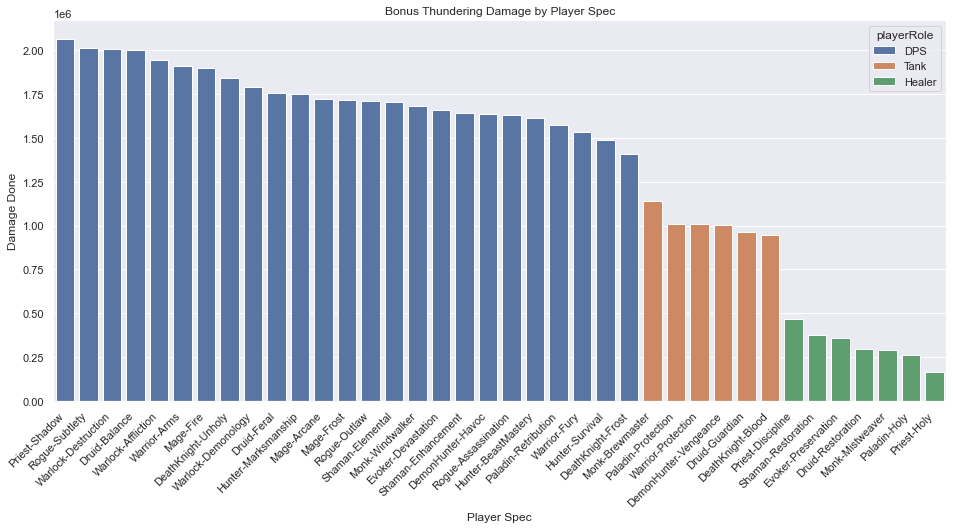

In [81]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=tab1.playerSpec,
                 y=tab1.bonusDamage,
                 orient='v', hue=tab1.playerRole, dodge=False);

# set axis labels and title
plt.xlabel('Player Spec')
plt.ylabel('Damage Done')
plt.xticks(rotation=45, ha='right')
plt.title('Bonus Thundering Damage by Player Spec');

Players with higher damage trends towards dot classes. This makes sense bc the players' dots are buffed:
- they dont lose as much damage when they need to run to a partner since the majority of their damage comes from dots
- the buffed dots carry over even after the thundering effect ends, allowing them to benefit from the buff for a longer period of time

#### Uptime by Spec

In [89]:
# uptime by spec
tab2 = df[df.playerRole=='DPS'].groupby(by='playerSpec').mean().reset_index().sort_values(by=['uptime'], ascending=False)

ranged_dps = ['Warlock-Affliction', 'Warlock-Destruction', 'Warlock-Demonology',
              'Mage-Fire', 'Mage-Arcane', 'Mage-Frost',
              'Hunter-Marksmanship', 'Hunter-BeastMastery',
              'Shaman-Elemental', 'Druid-Balance', 'Evoker-Devastation', 'Priest-Shadow']
tab2['playerRanged'] = tab2.playerSpec.apply(lambda x: 1 if x in ranged_dps else 0)

tab2.head()

,playerSpec,dungeonTimeLimit,keystoneLevel,keystoneTime,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike,uptime,bonusDamage,fractionOfDungeonTimer,inTime,totalDeathsOverload,totalDeathsStrike,totalDeathsThundering,playerRanged
20,Warlock-Affliction,1.984586e+06,15.174098,1.842427e+06,8.024621e+07,8.454544e+06,1.997877,185646.029724,0.511677,0.286624,0.014862,0.059448,0.106157,0.002123,0.004246,0.008493,10.128632,1.944545e+06,0.070458,1.0,0.106157,0.004246,0.110403,1
22,Warlock-Destruction,2.024709e+06,16.178491,1.851224e+06,8.558767e+07,8.735805e+06,2.015364,186149.495707,0.387709,0.335291,0.012653,0.077271,0.110258,0.005423,0.007682,0.011297,10.077647,2.009235e+06,0.085748,1.0,0.110258,0.007682,0.117939,1
10,Mage-Fire,2.024005e+06,16.297082,1.857462e+06,8.352965e+07,8.265089e+06,2.169761,186337.102122,0.454907,0.342175,0.011936,0.049072,0.082228,0.005305,0.009284,0.010610,10.047611,1.900970e+06,0.083221,1.0,0.082228,0.009284,0.091512,1
14,Priest-Shadow,2.016807e+06,16.102402,1.823789e+06,8.725028e+07,8.986156e+06,2.456200,182087.988838,0.405241,0.264256,0.010434,0.055084,0.102402,0.004368,0.008978,0.011162,10.023255,2.066816e+06,0.095509,1.0,0.102402,0.008978,0.111381,1
18,Shaman-Elemental,2.002380e+06,14.978655,1.835261e+06,7.421701e+07,7.413502e+06,2.956243,182403.811099,0.509072,0.228922,0.021878,0.117396,0.181964,0.008538,0.014408,0.019210,9.983637,1.705105e+06,0.083220,1.0,0.181964,0.014408,0.196371,1


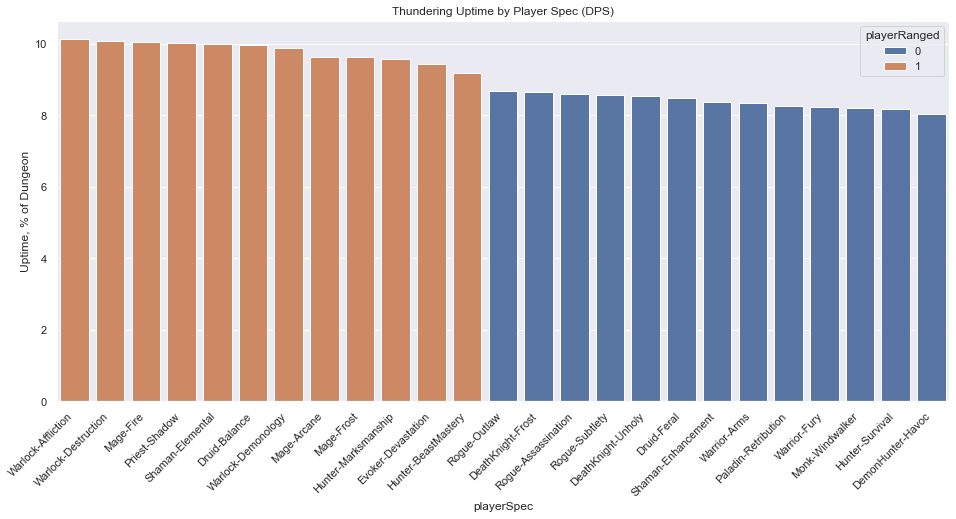

In [91]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=tab2.playerSpec,
                 y=tab2.uptime,
                 orient='v', hue=tab2.playerRanged, dodge=False);

# set axis labels and title
plt.ylabel('Uptime, % of Dungeon')
plt.xticks(rotation=45, ha='right')
plt.title('Thundering Uptime by Player Spec (DPS)');

Very obvious split down the middle. Thundering uptime tends to favour ranged dps by far. 

#### Bonus Damage by Dungeon

In [82]:
# bonus damage by spec
tab3 = df.groupby(by='dungeonName').mean().reset_index().sort_values(by=['bonusDamage'], ascending=False)
tab3.head()

,dungeonName,dungeonTimeLimit,keystoneLevel,keystoneTime,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike,uptime,bonusDamage,fractionOfDungeonTimer,inTime,totalDeathsOverload,totalDeathsStrike,totalDeathsThundering
4,NO,2400000.0,15.396458,2.219949e+06,8.200714e+07,7.822658e+06,2.439874,217789.814567,0.532648,0.273465,0.016967,0.101628,0.151842,0.006741,0.010340,0.013425,9.889035,1.799211e+06,0.075021,1.0,0.151842,0.010340,0.162182
0,AA,1920000.0,15.335964,1.803494e+06,7.845163e+07,7.351895e+06,2.249214,174348.829432,0.375207,0.247667,0.013543,0.077953,0.112930,0.007678,0.011357,0.014130,9.703001,1.690936e+06,0.060680,1.0,0.112930,0.011357,0.124287
3,HOV,2280000.0,15.129760,2.197672e+06,6.775205e+07,6.906865e+06,2.405262,207429.498558,0.471267,0.469190,0.013443,0.085103,0.129702,0.008020,0.012405,0.016905,9.485061,1.588579e+06,0.036109,1.0,0.129702,0.012405,0.142107
1,AV,2040000.0,15.311063,2.011624e+06,6.642749e+07,6.748124e+06,2.305890,203865.860321,0.618949,0.428424,0.021358,0.114182,0.169093,0.010347,0.015816,0.019363,10.176518,1.552069e+06,0.013910,1.0,0.169093,0.015816,0.184909
5,RLP,1800000.0,15.327786,1.727891e+06,6.314107e+07,5.645449e+06,2.895962,166359.274498,0.412195,0.417643,0.014926,0.090156,0.135980,0.008210,0.014703,0.018733,9.689344,1.298453e+06,0.040060,1.0,0.135980,0.014703,0.150683


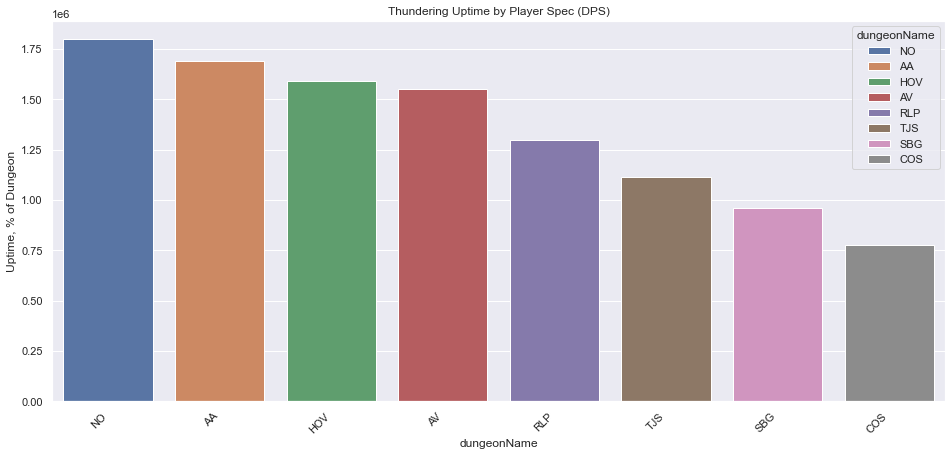

In [86]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=tab3['dungeonName'],
                 y=tab3['bonusDamage'],
                 orient='v', hue=tab3['dungeonName'], dodge=False);

# set axis labels and title
plt.ylabel('Uptime, % of Dungeon')
plt.xticks(rotation=45, ha='right')
plt.title('Bonus Damage by Dungeon');

Damage done per dungeon should also account for the number of trash mobs you can pull. Dungeons where you can pull large amounts of trash mobs will naturally have a higher damage bonus.

#### Uptime by Dungeon

In [87]:
# bonus damage by spec
tab4 = df.groupby(by='dungeonName').mean().reset_index().sort_values(by=['uptime'], ascending=False)
tab4.head()

,dungeonName,dungeonTimeLimit,keystoneLevel,keystoneTime,totalDamage,thunderingDamage,totalDeaths,thunderingTime,primalOverloads,lightningStrikes,deathsTwoAfterOverload,deathsFiveAfterOverload,deathsTenAfterOverload,deathsTwoAfterStrike,deathsFiveAfterStrike,deathsTenAfterStrike,uptime,bonusDamage,fractionOfDungeonTimer,inTime,totalDeathsOverload,totalDeathsStrike,totalDeathsThundering
1,AV,2040000.0,15.311063,2.011624e+06,6.642749e+07,6.748124e+06,2.305890,203865.860321,0.618949,0.428424,0.021358,0.114182,0.169093,0.010347,0.015816,0.019363,10.176518,1.552069e+06,0.013910,1.0,0.169093,0.015816,0.184909
4,NO,2400000.0,15.396458,2.219949e+06,8.200714e+07,7.822658e+06,2.439874,217789.814567,0.532648,0.273465,0.016967,0.101628,0.151842,0.006741,0.010340,0.013425,9.889035,1.799211e+06,0.075021,1.0,0.151842,0.010340,0.162182
7,TJS,1800000.0,15.435200,1.688054e+06,5.781523e+07,4.842281e+06,2.803156,166034.216232,0.417559,0.356369,0.015778,0.086167,0.128086,0.011004,0.018107,0.024045,9.885316,1.113725e+06,0.062192,1.0,0.128086,0.018107,0.146192
6,SBG,1980000.0,15.934387,1.526650e+06,5.176050e+07,4.164710e+06,1.621958,149815.279316,0.321493,0.504655,0.007023,0.045239,0.075739,0.006574,0.009962,0.012576,9.866455,9.578833e+05,0.228965,1.0,0.075739,0.009962,0.085701
0,AA,1920000.0,15.335964,1.803494e+06,7.845163e+07,7.351895e+06,2.249214,174348.829432,0.375207,0.247667,0.013543,0.077953,0.112930,0.007678,0.011357,0.014130,9.703001,1.690936e+06,0.060680,1.0,0.112930,0.011357,0.124287


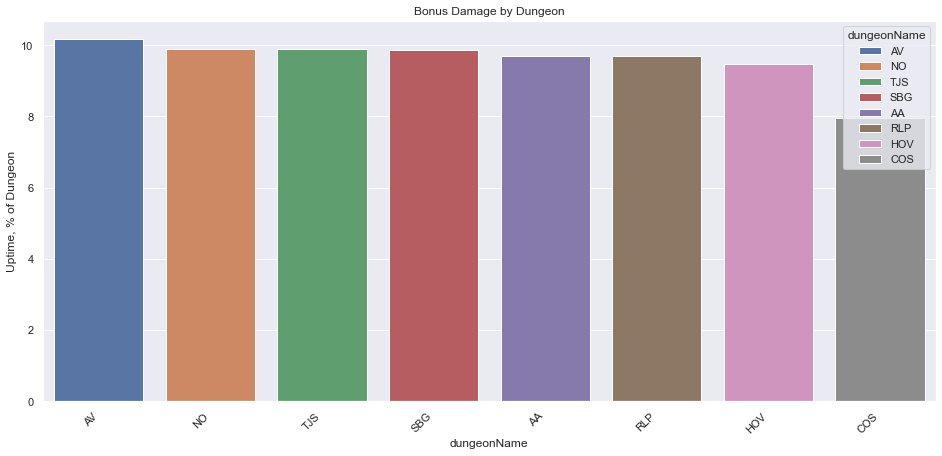

In [88]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=tab4['dungeonName'],
                 y=tab4['uptime'],
                 orient='v', hue=tab4['dungeonName'], dodge=False);

# set axis labels and title
plt.ylabel('Uptime, % of Dungeon')
plt.xticks(rotation=45, ha='right')
plt.title('Bonus Damage by Dungeon');

Thundering uptime does not seem to be affected by dungeon. COS is noticeably lower, which is interesting, however COS is one of the dungeons that require frequent stacking (enforcers, 2nd boss, 3rd boss) which is also the only way you can clear Thundering, so this may be related to the lower uptime. 

### 3.4 Stuns and Total Thundering Deaths by Spec, Dungeon

#### Stuns by Spec

In [34]:
# least stuns to primal overload
df.groupby('playerSpec').mean()['primalOverloads'].sort_values(ascending=True).head(5)

playerSpec
Rogue-Subtlety        0.231935
Hunter-Survival       0.276102
Warrior-Arms          0.295687
DeathKnight-Unholy    0.314521
Shaman-Enhancement    0.318704
Name: primalOverloads, dtype: float64

#### Thundering Deaths by Spec

In [35]:
# least thundering deaths
df.groupby('playerSpec').mean()['totalDeathsOverload'].sort_values(ascending=True).head(5)

playerSpec
Priest-Holy           0.024315
DeathKnight-Blood     0.049340
Paladin-Protection    0.060540
DeathKnight-Unholy    0.066997
Mage-Fire             0.082228
Name: totalDeathsOverload, dtype: float64

#### Stuns by Dungeon

In [36]:
# least stuns to primal overload
df.groupby('dungeonName').mean()['primalOverloads'].sort_values(ascending=True).head(5)

dungeonName
COS    0.258976
SBG    0.321493
AA     0.375207
RLP    0.412195
TJS    0.417559
Name: primalOverloads, dtype: float64

#### Thundering Deaths by Dungeon

In [37]:
# least thundering deaths
df.groupby('dungeonName').mean()['totalDeathsOverload'].sort_values(ascending=True).head(5)

dungeonName
COS    0.071091
SBG    0.075739
AA     0.112930
TJS    0.128086
HOV    0.129702
Name: totalDeathsOverload, dtype: float64

### 3.5 Primal Overload Deaths vs Lightning Strike Deaths

In [38]:
# calculate total deaths attributed to Thundering
df['totalDeathsThundering'] = df.totalDeathsOverload + df.totalDeathsStrike

#### % Deaths within 10s of Primal Overload or Lightning Strike

In [39]:
total_deaths = df['totalDeathsThundering'].sum()

# % deaths attributed to primal overload
total_overload_deaths = df['totalDeathsOverload'].sum()
print(f"{round((total_overload_deaths / total_deaths) * 100,2)}% of deaths can be attributed to Primal Overload.")

# % deaths attributed to lightning strike
total_strike_deaths = df['totalDeathsStrike'].sum()
print(f"{round((total_strike_deaths / total_deaths) * 100,2)}% of deaths can be attributed to Lightning Strike.")

90.02% of deaths can be attributed to Primal Overload.
9.98% of deaths can be attributed to Lightning Strike.


From the summary statistics we can see players are stunned about the same number of times by Primal Overload (0.41 times per dungeon) and Lightning Strike (0.38 times per dungeon). But from the calculations we just did, we know players die a lot more to Primal Overload. 

Based on player deaths alone, the impact of Lightning Strike in dungeons is about 10x less than the impact of Primal Overload. 

Due to its relatively low impact, we can leave Lightning Strike out of future analyses.

***

## 4. Data Visualisation

### 4.1 Bar Chart - Distribution of Keystone Levels

In [99]:
keystone_count = df.groupby(by=['keystoneLevel']).agg(keystoneCount=('keystoneLevel','count')).reset_index()

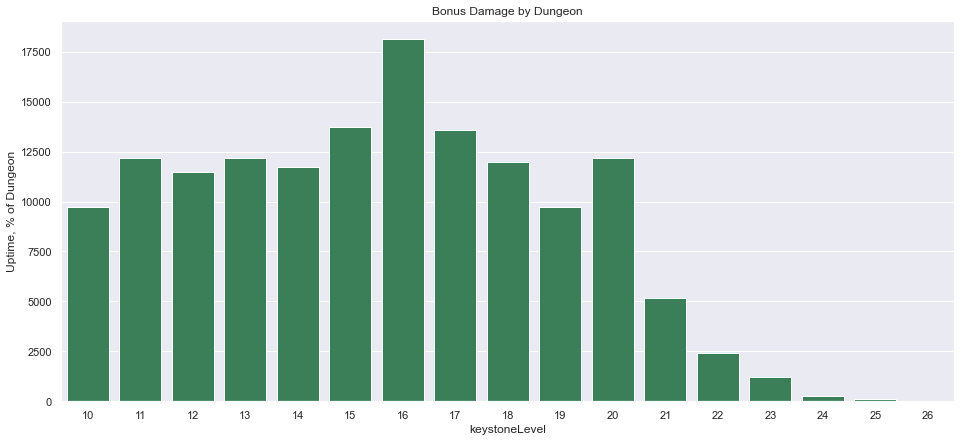

In [102]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=keystone_count.keystoneLevel,
                 y=keystone_count.keystoneCount,
                 orient='v', color='seagreen');

# set axis labels and title
plt.ylabel('Uptime, % of Dungeon')
plt.title('Bonus Damage by Dungeon');

There's a sharp decline in number of dungeon runs of keystone levels 21 and above. This is to be expected as higher keystone levels mean and increase in difficulty. It's also highly likely that keys at level 21 or higher simply disband instead of going for over time completion runs since over time score for 21+ keys were drastically reduced this season and players ahve nothing to gain from completing a 21+ dungeon over time. This shows a limitation in our data: trends at higher keystone levels may not be as accurate as we have less data about completed runs.

### 4.2 Box Plot - Bonus Damage and Uptime by Keystone Level

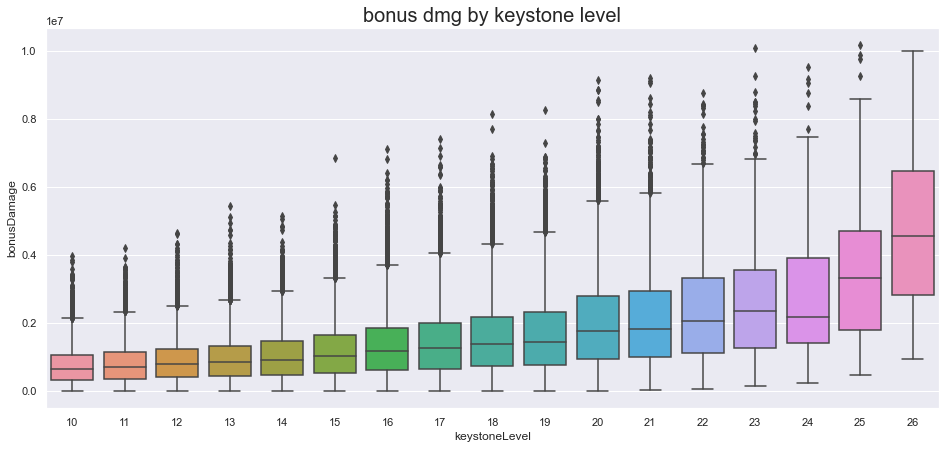

In [104]:
# bonus damage by keystone level
f, ax = plt.subplots(1,1, figsize = (16, 7))

ax = sns.boxplot(data = df, x = 'keystoneLevel', y = 'bonusDamage')
ax.set_title(label='bonus dmg by keystone level')

plt.show()

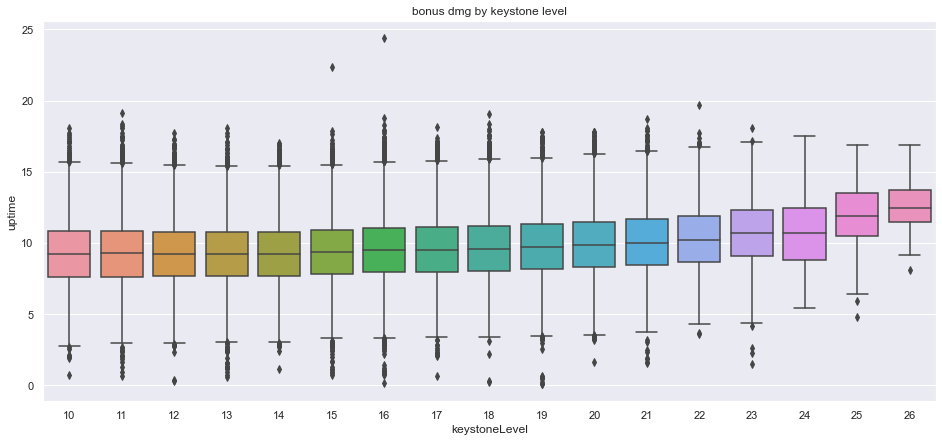

In [106]:
# bonus damage by keystone level
f, ax = plt.subplots(1,1, figsize = (16, 7))

ax = sns.boxplot(data = df, x = 'keystoneLevel', y = 'uptime')
ax.set_title(label='bonus dmg by keystone level')

plt.show()

### 4.3 Scatter Plot - Correlation between Bonus Damage and Uptime

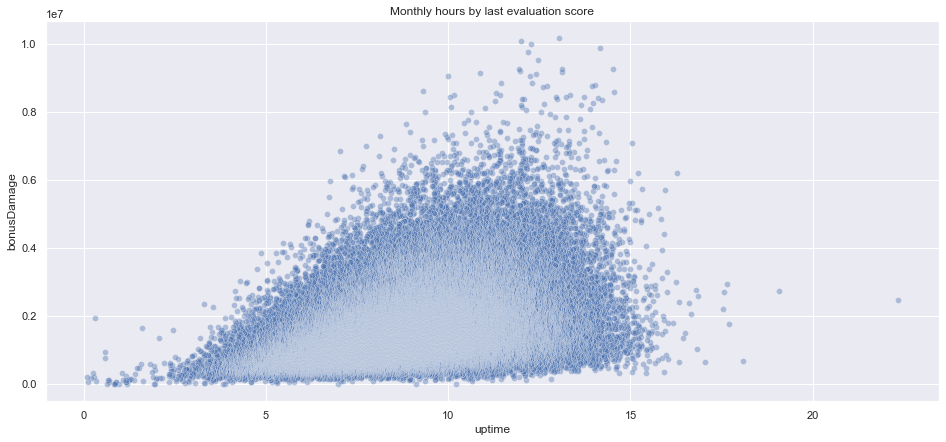

In [109]:
# create scatterplot
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df[df.playerRole=='DPS'], 
                x='uptime, % of dungeon', 
                y='bonusDamage', 
                alpha=0.4)

#plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')

#plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score');

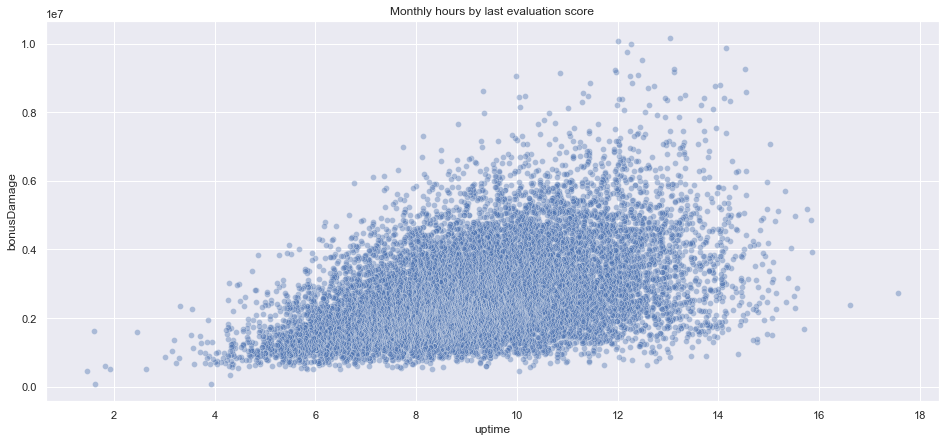

In [111]:
# create scatterplot
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df[(df.playerRole=='DPS')&(df.keystoneLevel>=20)], 
                x='uptime', 
                y='bonusDamage', 
                alpha=0.4)

#plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')

#plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score');

### 4.4 Box Plot - Thundering Deaths by Keystone Level

### 4.5 Bar Chart - Thundering Deaths within 2, 5 and 10s

### 4.6 Scatter Plot - Correlation between # of Thundering Stuns vs # of Thundering Deaths

***

## 5. Hypothesis Testing

***

## 6. Linear Regression

***

## 7. Conclusions

### 7.1 Takeaways

### 7.2 Recommended Solutions

### 7.3 Limitations of Data

### 7.4 Next Steps
- A more detailed analysis with full game logs, including causes of death, precise timings of thundering buff
- Being able to determine WHAT exactly killed players during thundereing would help to identify more specific problems with thundering (bad overlaps of stuns)
- Able to use such data to determine maybe the most optimal number of seconds of stun, or the most optimal amount of damage taken during stun so it doesnt result in a 1 shot all the time
- how often does stuns lead to a death
- analysis by player role and how thundering interacts with affixes might be nice, but irrelevant to today's discussion